# Session 7 - PEST, Parallel Processing and the Veneer command line

This session looks at options for parallel processing with Veneer - that is, by running multiple copies of Source, each with a Veneer server running, and giving instructions to each running copy in parallel.

You can establish multiple copies of Source/Veneer by running multiple copies of the Source application, loading a project and starting the Web Server Monitoring window on each one. Alternatively, you can use the Vener Command Line, which has presents the same interface to Python and other systems, without the overheads of the user interface.

This session also looks briefly at one of the main use cases for parallel processing with Veneer - model calibration - and some basic functionality available for using PEST with Source/Veneer.

## Overview

- Launching multiple copies of Veneer command line using veneer-py
- Running simulations in parallel
- The typical pattern of using PEST with Veneer
- Describing the PEST ‘job'
  - Veneer/Source end-point(s)
  - Getting the model ‘ready’ for optimisation
  - Describing the calibration parameters
  - Describing the objective and any observed data
  - What veneer-py is taking care of
- Running PEST, feedback
- Limitations

## The Veneer Command Line

The Veneer command line is a standalone executable program that runs the Source engine and exposes the Veneer network interface, without the main Source user interface.

The program is distributed with Veneer, although the setup process is a little different.

Where the Veneer plugin DLL can be used from any directory, the command line needs access to all the main DLLs supplied with Source. So, to setup the command line, you can either (a) copy the program and the other files supplied with Veneer, into your main Source installation directory, or (b) copy ALL of the files from the main Source directory into a common directory with Veneer.

Once you've done so, you should be able to run the Veneer command line. You can launch the Veneer command line directory from a Windows command prompt. Alternatively, you can start one or more copies directly from Python using `veneer.manage.start`:

In [1]:
from veneer.manage import start

In [2]:
help(start)

Help on function start in module veneer.manage:

start(project_fn, n_instances=1, ports=9876, debug=False, remote=True, script=True, veneer_exe=None)
    Start one or more copies of the Veneer command line progeram with a given project file
    
    Parameters:
    
    - project_fn - Path to a Source project file (.rsproj)
    
    - n_instances - Number of copies of the Veneer command line to start (default: 1)
    
    - ports - A single port number, indicating the port number of the first copy of the Veneer command line,
              OR a list of ports, in which case len(ports)==n_instances  (default: 9876)
    
    - debug - Set to True to echo all output from Veneer Command Line during startup
    
    - remote - Allow remote connections (requires registration)
    
    - script - Allow IronPython scripts
    
    - veneer_exe - Optional (but often required) path to the Veneer Command Line. If not provided,
                   veneer-py will attempt to identify the version of Ven

The main things you need, in order to call `start` are a Source project file (a path to the `.rsproj` file) and a path to the Veneer command line exe.

In the following block, you will need to, at very least, update the `veneer_exe` variable to reflect where you have stored the Veneer command line program.

(Now is a good time to explore the assistance that Jupyter can give in navigating the file system. When you start typing a literal string - eg `'D:/'` and press `<tab>` it will present you with a list of filesystem completions. Very handy - unless you have spaces in your path!)


In [3]:
project='ExampleProject/RiverModel.rsproj'
veneer_exe='D:\\src\\projects\\Veneer\\Compiled\\Source 4.1.0.4334 (public version) FULL\\FlowMatters.Source.VeneerCmd.exe'


We can now start up a number of Veneer command line 'servers'.

We'll specify how many we want using `num_copies` - Its a good idea to set this based on the number of CPU cores available.

We also set `first_port` - Which is used for the first server. This number is incremented by one for each extra server.

In [4]:
num_copies=4
first_port=9880
start(project,n_instances=num_copies,ports=9880,debug=True,veneer_exe=veneer_exe)

Starting D:\src\projects\Veneer\Compiled\Source 4.1.0.4334 (public version) FULL\FlowMatters.Source.VeneerCmd.exe -p 9880 -r -s  D:\src\projects\veneer-py\doc\training\ExampleProject\RiverModel.rsproj
Starting D:\src\projects\Veneer\Compiled\Source 4.1.0.4334 (public version) FULL\FlowMatters.Source.VeneerCmd.exe -p 9881 -r -s  D:\src\projects\veneer-py\doc\training\ExampleProject\RiverModel.rsproj
Starting D:\src\projects\Veneer\Compiled\Source 4.1.0.4334 (public version) FULL\FlowMatters.Source.VeneerCmd.exe -p 9882 -r -s  D:\src\projects\veneer-py\doc\training\ExampleProject\RiverModel.rsproj
Starting D:\src\projects\Veneer\Compiled\Source 4.1.0.4334 (public version) FULL\FlowMatters.Source.VeneerCmd.exe -p 9883 -r -s  D:\src\projects\veneer-py\doc\training\ExampleProject\RiverModel.rsproj
[2] Loading plugins

[3] Loading plugins

[0] Loading plugins

[0] Loaded D:\src\projects\Veneer\Compiled\Source 4.1.0.4334 (public version)\FlowMatters.Source.Veneer.dll

[0] Loaded C:\Program Fi

([<subprocess.Popen at 0x53b1b38>,
 [9880, 9881, 9882, 9883])

You should see a number of lines along the lines of `[3] Server started. Ctrl-C to exit...` indicating that the servers have started.

These servers will now run until your current python session ends. (To make that happen, without closing the notebook, use the `Kernel|Restart` menu option in Jupyter)


## Parallel Simulations

You can now work with each of these Veneer servers in the same way that you worked with a single server in the earlier sessions.

You will need an instance of the Veneer client object - one for each instance.

Here, we'll create a list of Veneer clients, each connected to a different instance based on the port number

In [5]:
import veneer

In [6]:
all_ports = list(range(first_port,first_port+num_copies))
all_ports

[9880, 9881, 9882, 9883]

In [7]:
vs = [veneer.Veneer(port=p) for p in all_ports]

You can now ask one of these servers to run a model for you:

In [8]:
vs[0].run_model()
vs[0].retrieve_multiple_time_series(criteria={'RecordingVariable':'Downstream Flow Volume'})[0:10]

,Confluence: Fish Creek Confluence: Downstream Flow Volume,Confluence: Shell Creek Confluence: Downstream Flow Volume,Gauge: Evaluation Gauge: Downstream Flow Volume,Gauge: Lower Gauge: Downstream Flow Volume,Gauge: Middle Gauge: Downstream Flow Volume,Inflow: Crab Creek: Downstream Flow Volume,Inflow: Fish Creek: Downstream Flow Volume,Inflow: Shell Creek: Downstream Flow Volume,Lagged Flow Routing: Default Link #3: Downstream Flow Volume,Minimum Flow Requirement: Lake Release: Downstream Flow Volume,...,Straight-Through Routing: Default Link #14: Downstream Flow Volume,Straight-Through Routing: Default Link #15: Downstream Flow Volume,Straight-Through Routing: Default Link #1: Downstream Flow Volume,Straight-Through Routing: Default Link #2: Downstream Flow Volume,Straight-Through Routing: Default Link #4: Downstream Flow Volume,Straight-Through Routing: Default Link #5: Downstream Flow Volume,Straight-Through Routing: Default Link #6: Downstream Flow Volume,Straight-Through Routing: Lake Outflow: Downstream Flow Volume,Supply Point: Supply Point 13: Downstream Flow Volume,Water User: Crop Fields: Downstream Flow Volume
1998-01-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1998-01-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1998-01-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1998-01-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1998-01-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1998-01-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1998-01-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1998-01-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1998-01-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1998-01-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


You could run a model on each server using a for loop:

In [9]:
for v in vs:
    veneer.log('Running on port %d'%v.port)
    v.run_model()
print('All runs finished')

Running on port 9880
Running on port 9881
Running on port 9882
Running on port 9883
All runs finished


But that is a sequential run - One run won't start until the previous run has finished.

The `async` option on `v.run_model` will trigger the run on the server and then allow Python to continue:


In [10]:
for v in vs:
    veneer.log('Running on port %d'%v.port)
    v.run_model(async=True)
print('All runs started... But when will they finish? And how will we know?')

Running on port 9880
Running on port 9881
Running on port 9882
Running on port 9883
All runs started... But when will they finish? And how will we know?


The above code block flies through quickly, because it doesn't wait for the simulation to finish. But how will we know when the run has finished, so that we can continue our script?

When run with `async=True`, `v.run_model` returns a HTTP connection object, that can be queried for the success code of the run. We can use this to block for a particular run to finish. Assuming we don't want to do anything else in our script until ALL runs are finished, this is a good approach:

In [11]:
responses = []
for v in vs:
    veneer.log('Running on port %d'%v.port)
    responses.append(v.run_model(async=True))

veneer.log("All runs started... Now we'll wait when until they finish")

for r,v in zip(responses,vs):
    code = r.getresponse().getcode()
    veneer.log('Run finished on port %d. Returned a HTTP %d code'%(v.port,code))

Running on port 9880
Running on port 9881
Running on port 9882
Running on port 9883
All runs started... Now we'll wait when until they finish
Run finished on port 9880. Returned a HTTP 302 code
Run finished on port 9881. Returned a HTTP 302 code
Run finished on port 9882. Returned a HTTP 302 code
Run finished on port 9883. Returned a HTTP 302 code


You can use this the `async` approach to run multiple, parallel simulations, from a notebook.

An alternate use of the Veneer command line is to use an external program to trigger the runs on each of the servers.

## Using PEST with Veneer

[PEST](http://www.pesthomepage.org/) is a model independent tool for parameterising models and for uncertainty analysis.

To proceed, download PEST and unzip it to a location on your system.

We will switch to a catchments model in order to perform rainfall runoff calibration

In [12]:
catchment_project='ExampleProject/CalibrationExample.rsproj'

In [13]:
num_copies=4
first_port=9885
start(catchment_project,n_instances=num_copies,ports=first_port,debug=True,veneer_exe=veneer_exe)

Starting D:\src\projects\Veneer\Compiled\Source 4.1.0.4334 (public version) FULL\FlowMatters.Source.VeneerCmd.exe -p 9885 -r -s  D:\src\projects\veneer-py\doc\training\ExampleProject\CalibrationExample.rsproj
Starting D:\src\projects\Veneer\Compiled\Source 4.1.0.4334 (public version) FULL\FlowMatters.Source.VeneerCmd.exe -p 9886 -r -s  D:\src\projects\veneer-py\doc\training\ExampleProject\CalibrationExample.rsproj
Starting D:\src\projects\Veneer\Compiled\Source 4.1.0.4334 (public version) FULL\FlowMatters.Source.VeneerCmd.exe -p 9887 -r -s  D:\src\projects\veneer-py\doc\training\ExampleProject\CalibrationExample.rsproj
Starting D:\src\projects\Veneer\Compiled\Source 4.1.0.4334 (public version) FULL\FlowMatters.Source.VeneerCmd.exe -p 9888 -r -s  D:\src\projects\veneer-py\doc\training\ExampleProject\CalibrationExample.rsproj
[2] Loading plugins

[3] Loading plugins

[0] Loading plugins

[1] Loading plugins

[1] Loaded D:\src\projects\Veneer\Compiled\Source 4.1.0.4334 (public version)\Fl

([<subprocess.Popen at 0xa2125f8>,
 [9885, 9886, 9887, 9888])

In [14]:
all_ports = list(range(first_port,first_port+num_copies))
all_ports

[9885, 9886, 9887, 9888]

In [15]:
vs = [veneer.Veneer(port=p) for p in all_ports]

If you have the `geopandas` package installed, we can visualise the network to see what we're dealling with. (Alternatively, open the project file in the Source application to see the network)

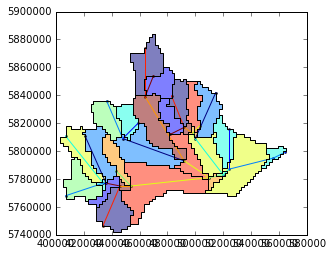

In [16]:
%matplotlib inline
v = vs[0]
v.network().as_dataframe().plot()

## Describing the PEST 'Job'

When configuring PEST to work with a particular model, you 'teach' PEST how to communicate with the model by describing the format of one or more text input files expected by the model and one or more text output files produced by the model. PEST will then generate updated input files for each simulation and read the updated output files that result from the simulation.

veneer-py has some basic functionality for setting up PEST runs that avoids the need to directly edit the PEST configuration files.

With veneer-py, you can describe a PEST job in Python, including describing the Source model parameters that you want to calibrate and the outputs that you want to calibrate against.

veneer-py will then write out the following PEST configuration files and invoke PEST:

* **PTF:** A PEST Template File, which describes how to run the model, including setting relevant model parameters and ensuring that the required model outputs are produced. PEST will substitute model parameters into this file, based on the configuration in the PCF. In the case of veneer-py, the PTF is a template of a Python script, which uses veneer-py to connect to a Source/Veneer server, sets parameters, runs the model and then compares results using defined statistics.
* **PIF:** A PEST Instruction File, which tells PEST where to find the observations that it needs for evaluating a simulation. In the case of veneer-py, these outputs are produced by the logic in the PTF.
* **PCF:** A PEST Control File, which desribes the parameters to be optimised and the observations to optimise to, as well as how to run the model.
* **PRF:** (OPTIONAL), used when performing a parallel calibration with more than one Veneer/Source server. Describes where (on the filesystem) to run the model from.

To establish all these files and run a PEST job, you can use functionality in veneer-py to describe a PEST 'Case'.

The 'Case' will ultimately know everything about the calibration

* what parameters you are calibrating and how they are constrained,
* what you are calibrating to,
* how many Source servers you have at your disposal
* any options related to PEST, such as which optimisation routine to use

In [17]:
from veneer.pest import Case

At very least, we need to give a Case a `name` - which is the basis for all the filenames that will be written out.

You can also specify:

* an optimiser (the default is `pest`, but the PEST software also comes several others)
* a list of Veneer/Source servers, described as a list of ports
* a random number seed in order to either make the optimisation deterministic or allow random variation


In [18]:
calibration = Case('CalibrationCase',optimiser='cmaes_p',model_servers=all_ports)

PEST has many options - most of which we leave at default. One option that we currently need is to put PEST into single precision mode. This is because PEST, in double precision mode, uses a syntax for floating point literals that is not valid Python:

In [19]:
calibration.options['PRECIS']='single' 

### Configuring the calibration parameters

PEST needs to be told about the calibration parameters

This is a two step process:
* Specify how to apply the parameter (using a statement as you would in Veneer. eg `model.catchment.runoff.set_param_values('baseflowCoefficient',0.5,fus=list(fu_types))` but with the actual value (`0.5`) changed to the PEST parameter name, with markers (eg `@v_bfCoeff@`). This information forms part of a dynamically generated Python script that PEST will modify and run for each simulation
* Tell PEST about the parameter, including its range.
  * This forms part of the PEST control file
  * In addition to the range, we also specify the initial value.
  * We take the initial value from the parameters set above, unless that values is close to the lower or upper bound. In that case, we change the initial value to be halfway between the min and max - to prevent PEST getting 'stuck'


We're performing a rainfall runoff calibration, with GR4J used in the model

We're going to perform a lumped calibration - ie one parameter set everywhere - but we could, alternatively, calibrate distinct parameters by functional unit type, or similar.

In [20]:
v.model.find_model_type('GR4J')

['TIME.Models.RainfallRunoff.GR4J.GR4J']

In [21]:
params = v.model.find_parameters('TIME.Models.RainfallRunoff.GR4J.GR4J')
params

['C', 'k', 'x1', 'x2', 'x3', 'x4']

We only want to calibrate `x1`-`x4` - (`C` and `k` are specific to the eWater version of GR4J - they provide a baseflow filter)

In [22]:
params = params[2:]
params

['x1', 'x2', 'x3', 'x4']

We need to assign ranges to each of these. The model implementation in Source has metadata about suitable ranges - but at this stage, there isn't an easy way to interrogate that information from veneer-py. You can check in the Source user interface (`Edit|Rainfall Runoff Models`) to see the ranges.

Having done that, we'll construct a Python dictionary of parameter ranges

In [23]:
ranges = {
    'x1':[1.0,1500.0],
    'x2':[-10.0,5.0],
    'x3':[1.0,500.0],
    'x4':[0.5,4.0]
}
ranges

{'x1': [1.0, 1500.0], 'x2': [-10.0, 5.0], 'x3': [1.0, 500.0], 'x4': [0.5, 4.0]}

Now, we can loop over each parameter and 'teach' PEST about it - ie tell PEST how to modify the parameter and tell PEST what range we want to calibrate over:

In [24]:
for param,param_range in ranges.items():
    print('Configuring %s'%param)

    pest_pname = '$'+param+'$'

    # 1. Tell PEST how to set the parameter
    calibration.parameters.model.catchment.runoff.set_param_values(param,pest_pname)

    # 2. Details of the PEST parameter. name, starting value, min, max

    # Decide what to use for the initial value... half way between min and max!
    initial = 0.5*(param_range[0]+param_range[1])
    
    calibration.parameters.describe(pest_pname,initial,param_range[0],param_range[1])

Configuring x2
Configuring x4
Configuring x1
Configuring x3


**Note:** When we tell PEST how to set the parameter in the model, we use a Python statement that looks similar to statements from earlier sessions:
```python
calibration.parameters.model.catchment.runoff.set_param_values(param,pest_pname)
# is similar to
v.model.catchment.runoff.set_param_values(param,value)
```
The instructions to PEST will in fact translate to instructions to a Veneer client (`v`). So everything after `.parameter.` should be something you can call on a Veneer client. The other main difference is that, instead of passing in an actual value at this point, you pass `pest_pname`, which will be something like `$x1$` and will get translated to an actual value at runtime.


The previous code has gone some way towards configuring the PEST job. We can get a preview of what has been achieved by asking to see the configuration as it stands.

First, the state of the PTF (PEST Template File). You can see that it looks very much like a Python script, except where it has references to things like `$x1$` and the like

In [25]:
print(calibration.ptf_text())

ptf $
from veneer.pest_runtime import *
from veneer import Veneer
from veneer.stats import * 
import pandas as pd
from veneer import general

general.PRINT_URLS=False
veneer_port=find_port()
v = Veneer(port=veneer_port)
v.model.catchment.runoff.set_param_values('x2',$x2$)
v.model.catchment.runoff.set_param_values('x4',$x4$)
v.model.catchment.runoff.set_param_values('x1',$x1$)
v.model.catchment.runoff.set_param_values('x3',$x3$)
# Run Model
v.drop_all_runs()
v.run_model(**{})

observed_ts={}
pest_observations=[]

# Get results
run_results = v.retrieve_run()

# Compute stats



# Write summary results
print(pest_observations)
write_outputs(pest_observations,'_CalibrationCase_output.txt')
write_outputs(pest_observations,'__outputs_to_keep.txt')



There are still gaps in the PTF - eg the `# Compute Stats` section - that will come as we describe the outputs and observations.

The PCF (PEST Control File) is also partly complete:

In [26]:
print(calibration.pcf_text())

pcf
* control data
restart estimation
4 0 1 0 1  
1 1 single point    
10.0 2.0 0.3 0.03 8   
10.0 10.0 0.001   
0.1     
50 0.005 4 4 0.005 4   
1 1 1       
* singular value decomposition
1
4 5e-07
0
* parameter groups
default_pg relative 0.01 0.001 switch 1.5 parabolic   
* parameter data
x2 none factor -2.5 -10.0 5.0 default_pg 1.0 0.0 1
x4 none factor 2.25 0.5 4.0 default_pg 1.0 0.0 1
x1 none factor 750.5 1.0 1500.0 default_pg 1.0 0.0 1
x3 none factor 250.5 1.0 500.0 default_pg 1.0 0.0 1 
* observation groups
default_og  
* observation data

* model command line
python _run_CalibrationCase.py
* model input/output
_run_CalibrationCase.tpl _run_CalibrationCase.py
_CalibrationCase_output.ins _CalibrationCase_output.txt



**Note:** There are a lot of options in the PCF - and we are using defaults. They are very well described in the PEST Manual and can be specified using `calibration.options`

In [27]:
calibration.options

OrderedDict([('NPAR', None), ('NOBS', None), ('NPARGP', 1), ('NPRIOR', 0), ('NOBSGP', 1), ('MAXCOMPDIM', ''), ('DERZEROLIM', ''), ('NTPLFLE', None), ('NINSFLE', None), ('PRECIS', 'single'), ('DPOINT', 'point'), ('NUMCOM', ''), ('JACFILE', ''), ('MESSFILE', ''), ('OBSREREF', ''), ('RLAMBDA1', 10.0), ('RLAMFAC', 2.0), ('PHIRATSUF', 0.3), ('PHIREDLAM', 0.03), ('NUMLAM', 8), ('JACUPDATE', ''), ('LAMFORGIVE', ''), ('DERFORGIVE', ''), ('RELPARMAX', 10.0), ('FACPARMAX', 10.0), ('FACORIG', 0.001), ('IBOUNDSTICK', ''), ('UPVECBEND', ''), ('ABSPARMAX', ''), ('PHIREDSWH', 0.1), ('NOPTSWITCH', ''), ('SPLITSWH', ''), ('DOAUI', ''), ('DOSENREUSE', ''), ('BOUNDSCALE', ''), ('NOPTMAX', 50), ('PHIREDSTP', 0.005), ('NPHISTP', 4), ('NPHINORED', 4), ('RELPARSTP', 0.005), ('NRELPAR', 4), ('PHISTOPTHRESH', ''), ('LASTRUN', ''), ('PHIABANDON', ''), ('ICOV', 1), ('ICOR', 1), ('IEIG', 1), ('IRES', ''), ('JCOSAVE', ''), ('VERBOSEREC', ''), ('JCOSAVEITN', ''), ('REISAVEITN', ''), ('PARSAVEITN', ''), ('PARSAVERUN

### Configuring the outputs and observations

PEST needs to know what its calibrating too. In our case, that means a time series of observed data, and a corresponding modelled time series. We also need the objective function and the time period for the calibration.

PEST has a tool for processing time series data (TSPROC) but we don't use it here. Rather, we compute the objective values in Python and just pass single numbers back to PEST.

We'll start by loading the observed flow time series data into this notebook and exploring the data a bit...

**Note**: Loading the data at this point serves two purposes:
1. We become more familiar with the data and can identify things like the time period we want to calibrate over, and
2. We work out the exact `pandas` command needed to load the data. We need to give this command to PEST later on to call as part of the simulations...

In [28]:
import pandas as pd
flows = pd.read_csv('SyntheticObservedFlow.csv',parse_dates=True,dayfirst=True,index_col=0)
flows[0::50] # Show every fifty days

,Flow
Date,
2007-01-01,0.000000
2007-02-20,0.000000
2007-04-11,2.437354
2007-05-31,23.732757
2007-07-20,99.520437
2007-09-08,725.071205
2007-10-28,4269.116910
2007-12-17,1362.268235
2008-02-05,2505.631788


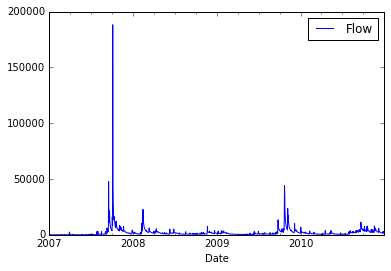

In [29]:
flows.plot()

**Note:** If your observed data had gaps during your simulation period, this would be a good point to establish the overlapping period in order to inform the simulation/calibration dates.

In our case, the data aligns with the simulation, so the simulation dates we want are just the start and end of the time series:

In [30]:
start,end = flows.index[[0,-1]]
start,end

(Timestamp('2007-01-01 00:00:00'), Timestamp('2010-12-31 00:00:00'))

This (synthetic) observed flow sequence relates to the (synthetic) gauge towards the bottom of the system. What was it called?

In [31]:
network = v.network()
nodes = network['features'].find_by_feature_type('node')
nodes._all_values('name')

['G123456A',
 'Generated node name #1',
 'Generated node name #2',
 'Generated node name #3',
 'Generated node name #4',
 'Generated node name #5',
 'Generated node name #6',
 'Generated node name #7',
 'Generated node name #8',
 'Generated node name #9',
 'Generated node name #10',
 'Generated node name #11',
 'Generated node name #12',
 'Generated node name #13',
 'Generated node name #14',
 'Generated node name #15',
 'Generated node name #16',
 'Generated node name #17',
 'Generated node name #18',
 'Generated node name #19',
 'Generated node name #20',
 'Generated node name #21',
 'Generated node name #22',
 'Generated node name #23',
 'Generated node name #24',
 'Generated node name #25',
 'Generated node name #26',
 'Generated node name #27',
 'Generated node name #28']

Aaah, we want `'G123456A'`

In [32]:
calibration_node = 'G123456A'

Now we can tell PEST about the observations and the comparison we want.

We need to tell PEST how to load the observed data - and the pandas command we used to do a test load will help:

```python
pd.read_csv('SyntheticObservedFlow.csv',parse_dates=True,dayfirst=True,index_col=0)
# will become
calibration.observations.data.read_csv('SyntheticObservedFlow.csv',parse_dates=True,dayfirst=True,index_col=0)
```


In [33]:
calibration.observations.data.read_csv('SyntheticObservedFlow.csv',parse_dates=True,dayfirst=True,index_col=0)

And we can set up the comparison

In [34]:
comparison={'NetworkElement':calibration_node,'RecordingVariable':'Downstream Flow Volume'}

veneer-py configures the observation based on the column name in the observed flow file (so that you can have multiple comparisons from different columns and files)

In [35]:
flows.columns

Index(['Flow'], dtype='object')

We also need to reference a stats function. You can write your own (but you'll need to store it in a `.py` file) or you can access one from `veneer.stats`

In [36]:
from veneer import stats

In [37]:
help(stats.nse)

Help on function nse in module veneer.stats:

nse(obs, pred)
    Nash-Sutcliffe Efficiency



In [38]:
calibration.observations.compare('Flow',comparison,stat=stats.nse,aggregation='daily')

We need to do one more thing: We need to make sure that each of our 4 servers is configured to record the output we require.

We'll need to loop over each of our veneer clients and configure recording. We have `comparison` which describes what we want to record. We can disable all other outputs

In [39]:
for v in vs:
    veneer.log('Configuring recording for server on port %d'%v.port)
    v.configure_recording(enable=[comparison],disable=[{}])

Configuring recording for server on port 9885
Configuring recording for server on port 9886
Configuring recording for server on port 9887
Configuring recording for server on port 9888


If we look at the content of the PEST config files now, we'll see more details filled in:

In [40]:
print(calibration.ptf_text())

ptf $
from veneer.pest_runtime import *
from veneer import Veneer
from veneer.stats import * 
import pandas as pd
from veneer import general

general.PRINT_URLS=False
veneer_port=find_port()
v = Veneer(port=veneer_port)
v.model.catchment.runoff.set_param_values('x2',$x2$)
v.model.catchment.runoff.set_param_values('x4',$x4$)
v.model.catchment.runoff.set_param_values('x1',$x1$)
v.model.catchment.runoff.set_param_values('x3',$x3$)
# Run Model
v.drop_all_runs()
v.run_model(**{})

observed_ts={}
pest_observations=[]

# Get results
run_results = v.retrieve_run()

# Compute stats
observed_ts.update(pd.read_csv('SyntheticObservedFlow.csv',dayfirst=True,index_col=0,parse_dates=True).dropna(how='all').to_dict('series'))
mod_ts = v.retrieve_multiple_time_series(run_data=run_results,criteria={'RecordingVariable': 'Downstream Flow Volume', 'NetworkElement': 'G123456A'},timestep="daily")
print(mod_ts.columns)
assert(len(mod_ts.columns==0))
mod_ts = mod_ts[mod_ts.columns[0]]
obs_ts = observed_ts["Flo

In [41]:
print(calibration.pif_text())

pif $
$Flow$ !Flow!


In [42]:
print(calibration.pcf_text())

pcf
* control data
restart estimation
4 1 1 0 1  
1 1 single point    
10.0 2.0 0.3 0.03 8   
10.0 10.0 0.001   
0.1     
50 0.005 4 4 0.005 4   
1 1 1       
* singular value decomposition
1
4 5e-07
0
* parameter groups
default_pg relative 0.01 0.001 switch 1.5 parabolic   
* parameter data
x2 none factor -2.5 -10.0 5.0 default_pg 1.0 0.0 1
x4 none factor 2.25 0.5 4.0 default_pg 1.0 0.0 1
x1 none factor 750.5 1.0 1500.0 default_pg 1.0 0.0 1
x3 none factor 250.5 1.0 500.0 default_pg 1.0 0.0 1 
* observation groups
default_og  
* observation data
Flow 0 1.0 default_og
* model command line
python _run_CalibrationCase.py
* model input/output
_run_CalibrationCase.tpl _run_CalibrationCase.py
_CalibrationCase_output.ins _CalibrationCase_output.txt



In [43]:
print(calibration.prf_text())

prf
4 0 0.5 1 0 run_slow_fac=1.5
Slave_9885 .\Slave_9885\
Slave_9886 .\Slave_9886\
Slave_9887 .\Slave_9887\
Slave_9888 .\Slave_9888\
1.0 1.0 1.0 1.0



## Running PEST

We can now invoke the PEST run.

This is the point where veneer-py stops helping you and you're handed over to PEST. (At this point in time)

When you call `calibration.run()`, PEST will start, and, in this case, it will start parallel PEST mode with 4 workers. However all output of PEST will be in files, and in the command prompt window from which you started the Jupyter notebook. You will need to look in these places for progress of the calibration.

**Note:** PEST needs to be in your Windows path. If its not, the `run()` command won't work. You can temporarily add PEST to your path from within the notebook:



In [44]:
pest_path='C:\\PEST'
import os
os.environ['PATH'] = os.environ['PATH']+';'+pest_path

In [45]:
calibration.run()